In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load the dataset
df = pd.read_csv('proteomics.txt', sep='\t', index_col=0)

# Transposing the dataset
# Since I want to cluster the patients (columns) based on their protein expression profiles, I transpose the dataset in order to
# make each column represent a protein, and each row a patient.
df = df.T

# Basic Descriptive Statistics
# print("Descriptive Statistics:\n", df.describe())

# Check for Missing Values
print("\nMissing Values:", df.isnull().sum().sum())



Missing Values: 0


In [15]:
df.head()

Protein_ID,A1BG,A2M,AAMDC,AARS1,AASDHPPT,AASS,ABAT,ABCC4,ABCE1,ABCF1,...,YWHAE,YWHAG,YWHAH,YWHAQ,YWHAZ,ZADH2,ZFHX3,ZNF185,ZNF207,ZYX
BC.1,1.047640e+09,1.304314e+10,35395800.0,77138600.0,1322772.000,2.149774e+07,1.615196e+07,2294820.000,1.101012e+07,24670800.0,...,2.717220e+09,7.508160e+08,577654000.0,1.149346e+09,7.624540e+09,9.264420e+06,4.984337e+05,1.496858e+07,1.708168e+07,102436400.0
BC.2,1.113700e+09,6.184000e+09,58690000.0,96508000.0,9252077.742,3.165600e+06,8.644212e+06,1917313.735,1.235980e+07,8326600.0,...,1.876420e+09,8.162600e+08,480040000.0,1.047000e+09,6.705200e+09,2.910213e+06,3.593441e+05,4.789986e+05,1.293843e+06,292820000.0
BC.3,1.055760e+09,6.564800e+09,9091800.0,46406000.0,3913600.000,4.620000e+06,4.325549e+06,3463000.000,2.843400e+06,7310400.0,...,1.758920e+09,1.137120e+09,697180000.0,1.359340e+09,8.877000e+09,1.543817e+06,6.227843e+05,3.823402e+05,3.410526e+06,168724000.0
BC.4,1.104000e+09,4.329400e+09,41908000.0,17550000.0,1687937.466,5.226863e+06,7.219093e+06,3200134.601,1.423474e+06,6473600.0,...,1.184080e+09,6.620400e+08,473080000.0,7.363200e+08,3.372000e+09,2.494988e+06,3.323255e+05,4.357254e+05,1.235035e+07,651260000.0
BC.5,1.158380e+09,9.797400e+09,39804000.0,56650000.0,5560375.423,9.672200e+06,8.832000e+06,5298370.284,7.971200e+06,7818800.0,...,2.570000e+09,7.799800e+08,419820000.0,1.485820e+09,7.733800e+09,5.560051e+05,8.482400e+07,4.351219e+05,1.137900e+07,213560000.0


In [9]:

# Standardizing the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [10]:
scaled_data.shape # (140, 3121)

(140, 3121)

In [1]:
# standard pca
# Dimensionality reduction with PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

In [11]:
# sparse PCA
from sklearn.decomposition import SparsePCA

# Number of components to keep
n_components = 50  #  adjust this number

# Initialize and fit SparsePCA
sparse_pca = SparsePCA(n_components=n_components, random_state=42)
sparse_pca_data = sparse_pca.fit_transform(scaled_data)

# sparse_pca_data now contains the reduced dataset

In [12]:
import joblib

# Save the sparse_pca_data to a file
joblib.dump(sparse_pca_data, 'sparse_pca_data.pkl')


['sparse_pca_data.pkl']

In [ ]:
# Load the sparse_pca_data from the file
sparse_pca_data = joblib.load('sparse_pca_data.pkl')


c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

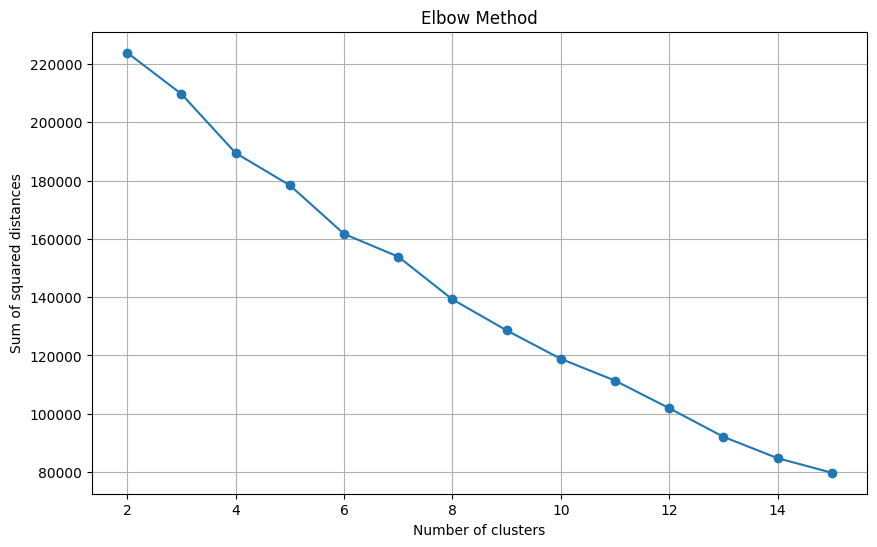

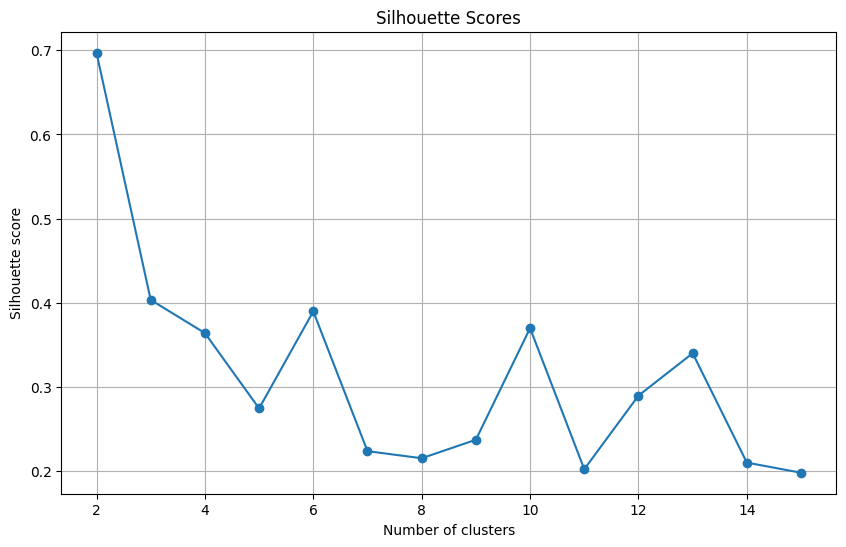

In [18]:
from sklearn.cluster import KMeans

# Assuming a maximum number of clusters you want to test
max_clusters = 15

# Storing Sum of Squared Distances
ssd = []
# Storing Silhouette Scores
silhouette_scores = []

for k in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(sparse_pca_data)
    
    # Sum of squared distances of samples to their closest cluster center
    ssd.append(kmeans.inertia_)

    # Silhouette Score
    score = silhouette_score(sparse_pca_data, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), ssd, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.grid(True)
plt.show()

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.grid(True)
plt.show()


In [14]:
optimal_k = 6  
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_kmeans.fit(sparse_pca_data)

# Getting the cluster labels
cluster_labels = final_kmeans.labels_

# You can now use cluster_labels for further analysis


c:\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


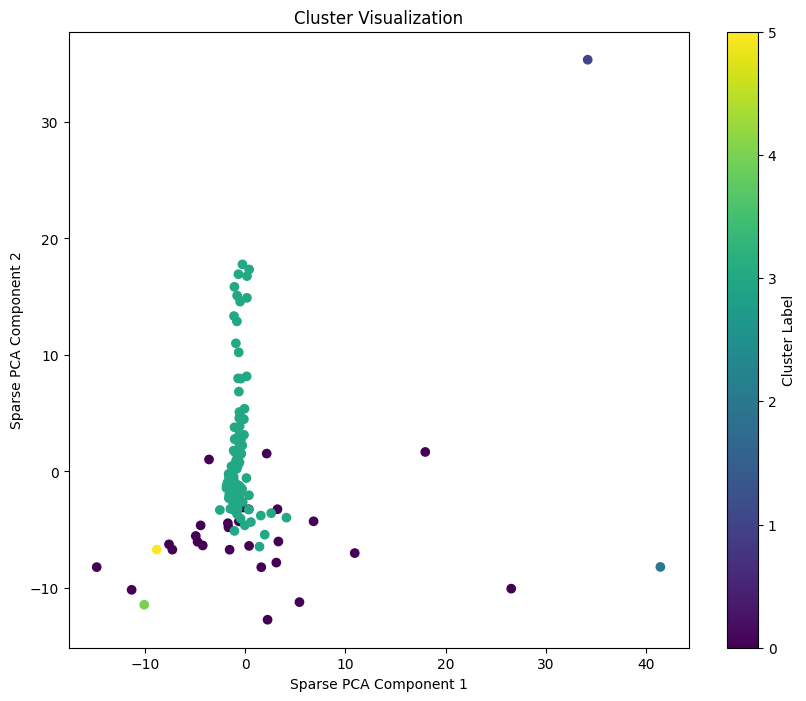

In [19]:
import matplotlib.pyplot as plt

# Assuming you've done a Sparse PCA with at least 2 components
plt.figure(figsize=(10, 8))
plt.scatter(sparse_pca_data[:, 0], sparse_pca_data[:, 1], c=cluster_labels, cmap='viridis')
plt.title('Cluster Visualization')
plt.xlabel('Sparse PCA Component 1')
plt.ylabel('Sparse PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


In [20]:
import pandas as pd

# Assuming your patients' IDs are in the same order as the clustering labels
patient_ids = df.index  # or use a list of patient IDs if they are not the index

# Create a DataFrame with the cluster assignments
cluster_df = pd.DataFrame({'Protein_ID': patient_ids, 'Cluster': cluster_labels})

# Save to CSV
cluster_df.to_csv('cluster_assignments.csv', index=False)


In [21]:
# t-SNE
from sklearn.manifold import TSNE

# Number of components to reduce to (usually 2 for visualization)
n_components = 2

# Initialize and fit t-SNE
tsne = TSNE(n_components=n_components, random_state=42)
tsne_data = tsne.fit_transform(scaled_data)

# tsne_data now contains the 2D representation of the data


In [6]:
# !pip install --user umap-learn


In [22]:
# UMAP
import umap

# Number of components and nearest neighbors
n_components = 2
n_neighbors = 15  #  adjust this number

# Initialize and fit UMAP
umap_model = umap.UMAP(n_neighbors=n_neighbors, n_components=n_components, random_state=42)
umap_data = umap_model.fit_transform(scaled_data)

# umap_data now contains the 2D representation of the data


c:\Python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
C:\Users\sywu_\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


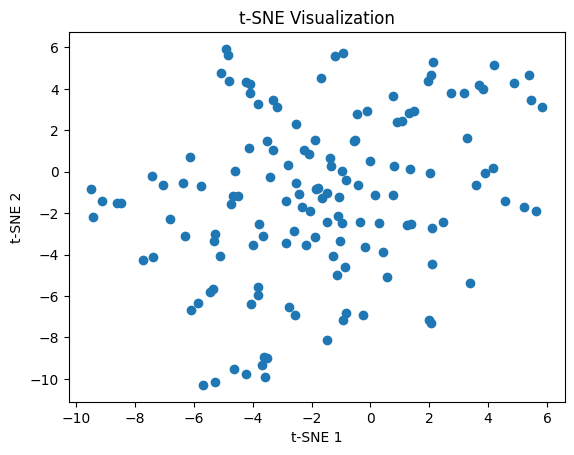

In [23]:
plt.scatter(tsne_data[:, 0], tsne_data[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()



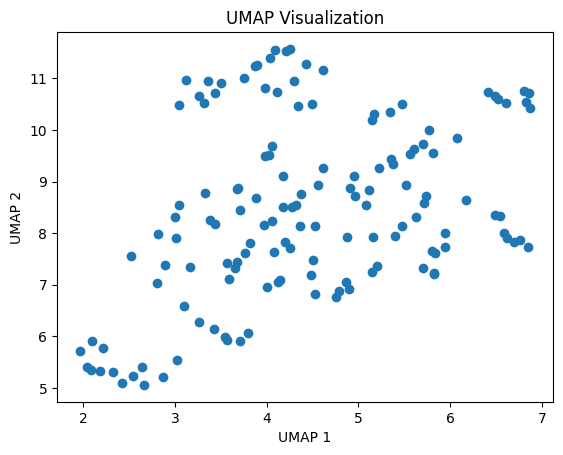

In [24]:
plt.scatter(umap_data[:, 0], umap_data[:, 1])
plt.title('UMAP Visualization')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()
